# Data Mining and Sentiment Analysis on Vapiano Tower Bridge Restaurant
**Data gathered from TripAdvisor**

In [21]:
!pip install bs4
!pip install python-csv
!pip install beautifulsoup
!pip install -U selenium
!pip install webdriver_manager

  Using cached python_csv-0.0.13-py3-none-any.whl
  Using cached demjson-2.2.4-py3-none-any.whl
  Using cached leven-1.0.4.tar.gz (20 kB)
  Using cached jtutils-0.0.8-py3-none-any.whl
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Running setup.py clean for leven
Failed to build leven
    Running setup.py install for leven: started
    Running setup.py install for leven: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'D:\Software\Anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-evuowpue\\leven_d74c1925fdce4223b9f7a31976ef4873\\setup.py'"'"'; __file__='"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-evuowpue\\leven_d74c1925fdce4223b9f7a31976ef4873\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\USER\AppData\Local\Temp\pip-wheel-1n8lf07v'
       cwd: C:\Users\USER\AppData\Local\Temp\pip-install-evuowpue\leven_d74c1925fdce4223b9f7a31976ef4873\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\leven
  copying leven\__init__.py -> build\lib.win-amd64-3.8\leven
  running build_ext
  b

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Using cached BeautifulSoup-3.2.1.tar.gz (31 kB)
  Using cached BeautifulSoup-3.2.0.tar.gz (31 kB)


    ERROR: Command errored out with exit status 1:
     command: 'D:\Software\Anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-ta2z276w\\beautifulsoup_fabc2b2a9d5b474f83c50f51d57cec7f\\setup.py'"'"'; __file__='"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-ta2z276w\\beautifulsoup_fabc2b2a9d5b474f83c50f51d57cec7f\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\USER\AppData\Local\Temp\pip-pip-egg-info-dyztm6zt'
         cwd: C:\Users\USER\AppData\Local\Temp\pip-install-ta2z276w\beautifulsoup_fabc2b2a9d5b474f83c50f51d57cec7f\
    Complete output (6 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\USER\AppData\Local\Temp\pip-install-ta2z276w\beautifulsoup_fabc2b2a9d5b474f83c50f51d57cec7f

In [2]:
import bs4
bs4.__version__
import sys
import csv
from selenium import webdriver
import time
import re
import requests
from bs4 import BeautifulSoup


In [42]:

# if you pass the inputs in the command line
if (len(sys.argv) == 4):
    path_to_file = sys.argv[1]
    num_page = int(sys.argv[2])
    url = sys.argv[3]

In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\USER\.wdm\drivers\chromedriver\win32\91.0.4472.19\chromedriver.exe] found in cache


In [44]:
path_to_file = "vapiano.csv"

In [45]:
num_page = 40

In [46]:
url = "https://www.tripadvisor.ca/Restaurant_Review-g186338-d15266425-Reviews-Vapiano_Tower_Bridge-London_England.html"

In [49]:
#path_to_file = "vapiano.csv"
#num_page = 40
#url = "https://www.tripadvisor.ca/Restaurant_Review-g186338-d15266425-Reviews-Vapiano_Tower_Bridge-London_England.html"

 
#driver = webdriver.Chrome('./chromedriver_Win32/chromedriver')
driver.get(url)
driver.maximize_window()
                          
# Open the file to save the review
csvFile = open(path_to_file, 'a', encoding="utf-8")
csvWriter = csv.writer(csvFile)

# change the value inside the range to save more or less reviews
for i in range(0, num_page):
    
    try:
        driver.find_element_by_xpath("//span[@class='taLnk ulBlueLinks']").click()
    except:
        print("there is no read more element")
    
#     container = driver.find_elements_by_xpath(".//div[@class='review-container']")
    page_soup = BeautifulSoup(driver.page_source, 'html.parser')
    reviews_container = page_soup.find_all('div', class_='review-container')
    time.sleep(20)
    
    for j in range(len(reviews_container)):
        
        user = reviews_container[j].find_all('div', class_="memberOverlayLink clickable")
        UID = user[0].get('id')
        user_name = user[0].find_all('div')[-1].get_text()
        count_review = user[1].find_all('span')[-1].get_text()
        
        re = reviews_container[j].find('div', class_="ui_column is-9")

        title = re.find('span', class_='noQuotes').get_text()
        date = re.find('span', class_='ratingDate').get('title')
        rating = re.find('span', class_='ui_bubble_rating').get('class')[1].split('_')[1]
        review = re.find('p', class_='partial_entry').get_text()

        csvWriter.writerow([UID, user_name, count_review,date, rating, title, review]) 

    # change the page
    try:
        driver.find_element_by_xpath('.//a[@class="nav next ui_button primary"]').click()
    except:
        driver.close()
driver.close()

there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element


InvalidSessionIdException: Message: invalid session id


In [4]:
import pandas as pd
pd.options.display.max_rows = 10

import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords, wordnet


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df = pd.read_csv("vapiano_clean.csv", engine='python')
df

,Date,Ratings,Titles,Reviews
0,17-Apr-21,10,Tried to order takeaway pizza,"So, pretty empty, lots of staff, tried or orde..."
1,9-Jan-21,40,Nice break for lunch!,We stopped here for lunch after visiting the T...
2,14-Oct-20,10,Very disappointing,After the track and trace the very laborius on...
3,10-Oct-20,50,Good family night out,I love going to Vapiano with my two young chil...
4,5-Oct-20,30,"brilliant carbonara, awful service",visited here a couple of times and it is the b...
...,...,...,...,...
79,11-Feb-19,50,Impressive,It was great to relish the pizza and pasta. Ve...
80,9-Feb-19,40,We were very pleasantly surprised,Don’t be put off by the unusual credit card ar...
81,26-Jan-19,50,Early dinner,Don’t know why there is lots of negative revie...
82,12-Jan-19,20,Like A Bad School Cafeteria,I’ve eaten here numerous times since this Vapi...


In [7]:
df.columns

Index(['Date', 'Ratings', 'Titles', 'Reviews'], dtype='object')

In [8]:
print(df.describe().transpose())

         count       mean        std   min   25%   50%   75%   max
Ratings   84.0  34.880952  14.436738  10.0  20.0  40.0  50.0  50.0


In [9]:
df['Ratings'] = df['Ratings'].replace({10:'VERY NEGATIVE',20:'NEGATIVE',30:'NEUTRAL',40:'POSITIVE',50:'VERY POSITIVE'})
df

,Date,Ratings,Titles,Reviews
0,17-Apr-21,VERY NEGATIVE,Tried to order takeaway pizza,"So, pretty empty, lots of staff, tried or orde..."
1,9-Jan-21,POSITIVE,Nice break for lunch!,We stopped here for lunch after visiting the T...
2,14-Oct-20,VERY NEGATIVE,Very disappointing,After the track and trace the very laborius on...
3,10-Oct-20,VERY POSITIVE,Good family night out,I love going to Vapiano with my two young chil...
4,5-Oct-20,NEUTRAL,"brilliant carbonara, awful service",visited here a couple of times and it is the b...
...,...,...,...,...
79,11-Feb-19,VERY POSITIVE,Impressive,It was great to relish the pizza and pasta. Ve...
80,9-Feb-19,POSITIVE,We were very pleasantly surprised,Don’t be put off by the unusual credit card ar...
81,26-Jan-19,VERY POSITIVE,Early dinner,Don’t know why there is lots of negative revie...
82,12-Jan-19,NEGATIVE,Like A Bad School Cafeteria,I’ve eaten here numerous times since this Vapi...


In [10]:
df.head()

,Date,Ratings,Titles,Reviews
0,17-Apr-21,VERY NEGATIVE,Tried to order takeaway pizza,"So, pretty empty, lots of staff, tried or orde..."
1,9-Jan-21,POSITIVE,Nice break for lunch!,We stopped here for lunch after visiting the T...
2,14-Oct-20,VERY NEGATIVE,Very disappointing,After the track and trace the very laborius on...
3,10-Oct-20,VERY POSITIVE,Good family night out,I love going to Vapiano with my two young chil...
4,5-Oct-20,NEUTRAL,"brilliant carbonara, awful service",visited here a couple of times and it is the b...


In [11]:
print(len(df))

84


In [12]:
df['Reviews'].nunique()

84

In [13]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
def clean(s):
    s = s.lower()                   #Converting to lower case
    s = re.sub(r'[^\w\s]', ' ', s)  #Removing punctuation
    s = re.sub(r'[\d+]', ' ', s)    #Removing Numbers
    s = s.strip()                   #Removing trailing spaces
    s = re.sub(' +', ' ', s)        #Removing extra whitespaces
    return s

In [16]:
df["Reviews"] = df["Reviews"].apply(lambda x: clean(x))

In [17]:
df.head(20)

,Date,Ratings,Titles,Reviews
0,17-Apr-21,VERY NEGATIVE,Tried to order takeaway pizza,so pretty empty lots of staff tried or order a...
1,9-Jan-21,POSITIVE,Nice break for lunch!,we stopped here for lunch after visiting the t...
2,14-Oct-20,VERY NEGATIVE,Very disappointing,after the track and trace the very laborius on...
3,10-Oct-20,VERY POSITIVE,Good family night out,i love going to vapiano with my two young chil...
4,5-Oct-20,NEUTRAL,"brilliant carbonara, awful service",visited here a couple of times and it is the b...
...,...,...,...,...
15,16-Feb-20,POSITIVE,Good food but poor execution,had a good meal here food was tasty and portio...
16,13-Feb-20,VERY NEGATIVE,Mrs Lynda,one of the staff was extremely unprofessional ...
17,11-Feb-20,POSITIVE,Fantastic food and ambience,its mostly a self service restaurant but the a...
18,2-Feb-20,NEUTRAL,"Nice food, terrible concept",we thought the menu had good variety sensible ...


# Stopwords
#Stopwords are words in NLP that have a very little meaning, such as "is", "an", "the", etc

In [18]:
df["Reviews"] = df["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [19]:
df["Reviews"][6]

'welp service bad false advertisement drinks e g advertise canned drink gave ml glass bottle paid caprisun sized drink got orders wrong times woooow also asked take away box brought bag currently balancing food head'

# Stemming
#Stemming is the removal of inflectional (changing/deriving) affixes such as (-ed,-ize, -s,-de,mis). In other words, Stemming is a method of normalization of words in NLP

In [20]:
st = PorterStemmer()
df['cleaned_Reviews'] = df['Reviews'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Reviews']

0     pretty empty lots staff tried order takeaway p...
1     stopped lunch visiting tower bridge best branc...
2     track trace laborius line ordering system made...
3     love going vapiano two young children toddler ...
4     visited couple times best carbonara ever taste...
                            ...                        
79    great relish pizza pasta verdure favourite mak...
80    put unusual credit card arrangement faced go y...
81    know lots negative reviews found food excellen...
82    eaten numerous times since vapiano first opene...
83    one party gluten free almost italian restauran...
Name: Reviews, Length: 84, dtype: object

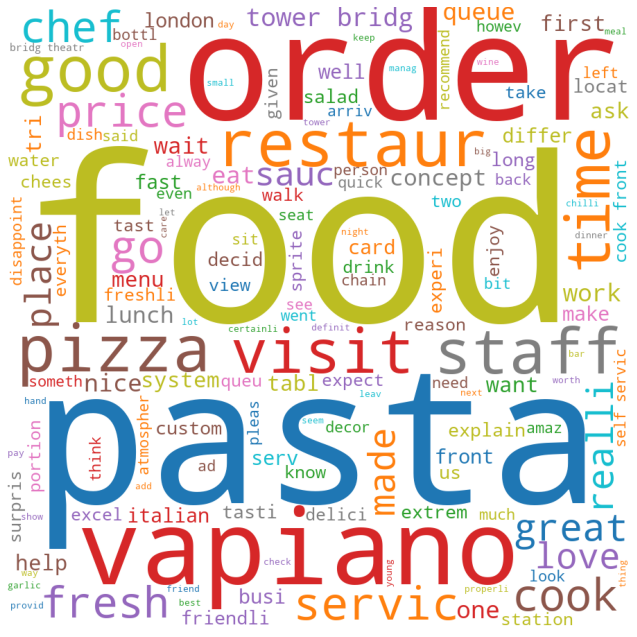

In [22]:
reviews = pd.Series(df["cleaned_Reviews"].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = WordCloud(width = 900, height = 900,background_color='white', colormap='tab10', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

#Check colors https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Tokenization
Tokenization is splitting a body of text into smaller units, such as individual words or terms. Each of these smaller units are called tokens

In [23]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [24]:
df['Reviews']=df['Reviews'].apply(str)

In [25]:
tokenizer = RegexpTokenizer(r'\w+')
df["Reviews_Token"] = df["Reviews"].apply(lambda x: tokenizer.tokenize(x))

In [26]:
df['Reviews_Token']

0     [pretty, empty, lots, staff, tried, order, tak...
1     [stopped, lunch, visiting, tower, bridge, best...
2     [track, trace, laborius, line, ordering, syste...
3     [love, going, vapiano, two, young, children, t...
4     [visited, couple, times, best, carbonara, ever...
                            ...                        
79    [great, relish, pizza, pasta, verdure, favouri...
80    [put, unusual, credit, card, arrangement, face...
81    [know, lots, negative, reviews, found, food, e...
82    [eaten, numerous, times, since, vapiano, first...
83    [one, party, gluten, free, almost, italian, re...
Name: Reviews_Token, Length: 84, dtype: object

# Lemmatization
Lemmatization extracts the root of the word. For example, from the word "driving', "drive" is extracted. Unlike stemming, lemmatization understands the context and provides the root words rather than simply removing the suffix or prefix of the word.

In [27]:
lemm = WordNetLemmatizer()

In [28]:
def to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemm_text(text):
    nltk_tagged = nltk.pos_tag(text)
    # Result = (text, pos_tag)
    wordnet_tagged = map(lambda x: (x[0], to_wordnet(x[1])), nltk_tagged)
    lemm_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemm_sentence.append(word)
        else:
            lemm_sentence.append(lemm.lemmatize(word, tag))
    return lemm_sentence

In [29]:
df["Reviews_Lemm"] = df["Reviews_Token"].apply(lambda x: lemm_text(x))

In [30]:
df[["Reviews_Token", "Reviews_Lemm"]].sample(14)

,Reviews_Token,Reviews_Lemm
72,"[first, visit, pasta, nothing, disappointed, s...","[first, visit, pasta, nothing, disappointed, s..."
10,"[family, enjoy, first, time, vapiano, love, fr...","[family, enjoy, first, time, vapiano, love, fr..."
56,"[vapianos, restaurant, prepares, pasta, meals,...","[vapianos, restaurant, prepares, pasta, meal, ..."
7,"[staff, lovely, one, staff, working, exit, doo...","[staff, lovely, one, staff, work, exit, door, ..."
68,"[problem, queuing, get, food, fast, food, plac...","[problem, queue, get, food, fast, food, place,..."
...,...,...
81,"[know, lots, negative, reviews, found, food, e...","[know, lot, negative, review, find, food, exce..."
3,"[love, going, vapiano, two, young, children, t...","[love, go, vapiano, two, young, child, toddler..."
0,"[pretty, empty, lots, staff, tried, order, tak...","[pretty, empty, lots, staff, try, order, takea..."
67,"[concept, dated, much, queuing, cooking, slow,...","[concept, date, much, queue, cook, slow, food,..."


In [31]:
df.to_csv("Cleaned_Reviews.csv")

In [32]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
#Analyze positive and negative statements from the review
def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

#Analyze personal opinion, emotion or judgment 
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

In [34]:
df.dropna(subset=['Reviews_Lemm'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [35]:
df['Subjectivity'] = df['Reviews_Lemm'].apply(getSubjectivity)
df['Polarity'] = df['Reviews_Lemm'].apply(getPolarity)
df.sample(5)

,Date,Ratings,Titles,Reviews,cleaned_Reviews,Reviews_Token,Reviews_Lemm,Subjectivity,Polarity
51,4-Aug-19,VERY NEGATIVE,Chicken Cesar salad is terrible,friend ordered healthy chicken salad vapiano b...,friend order healthi chicken salad vapiano bas...,"[friend, ordered, healthy, chicken, salad, vap...","[friend, order, healthy, chicken, salad, vapia...",0.553333,-0.133333
29,18-Nov-19,VERY POSITIVE,Great food and service overall,strongly recommend vipiano tower bridge restau...,strongli recommend vipiano tower bridg restaur...,"[strongly, recommend, vipiano, tower, bridge, ...","[strongly, recommend, vipiano, tower, bridge, ...",0.622619,0.380952
18,2-Feb-20,NEUTRAL,"Nice food, terrible concept",thought menu good variety sensible prices food...,thought menu good varieti sensibl price food g...,"[thought, menu, good, variety, sensible, price...","[think, menu, good, variety, sensible, price, ...",0.533333,0.291667
68,1-Apr-19,NEUTRAL,Really just a Fast Food place…whatever else yo...,problem queuing get food fast food places like...,problem queu get food fast food place like sen...,"[problem, queuing, get, food, fast, food, plac...","[problem, queue, get, food, fast, food, place,...",0.333333,0.016667
79,11-Feb-19,VERY POSITIVE,Impressive,great relish pizza pasta verdure favourite mak...,great relish pizza pasta verdur favourit make ...,"[great, relish, pizza, pasta, verdure, favouri...","[great, relish, pizza, pasta, verdure, favouri...",0.675000,0.650000


In [36]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
#df.head()


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   84 non-null     object 
 1   Ratings                84 non-null     object 
 2   Titles                 84 non-null     object 
 3   Reviews                84 non-null     object 
 4   cleaned_Reviews        84 non-null     object 
 5   Reviews_Token          84 non-null     object 
 6   Reviews_Lemm           84 non-null     object 
 7   Subjectivity           84 non-null     float64
 8   Polarity               84 non-null     float64
 9   Analysis_Polarity      84 non-null     object 
 10  Analysis_Subjectivity  84 non-null     object 
dtypes: float64(2), object(9)
memory usage: 7.3+ KB


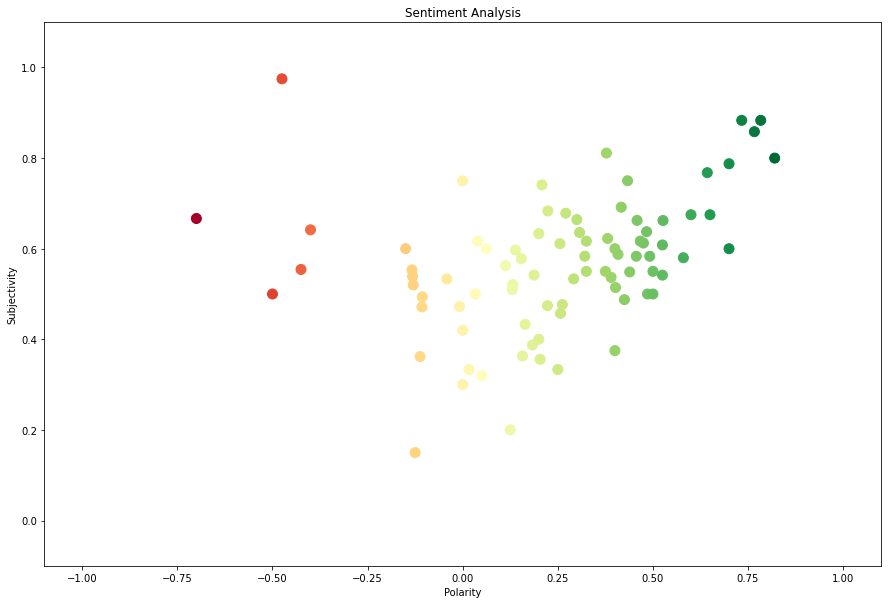

(None,)

In [38]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

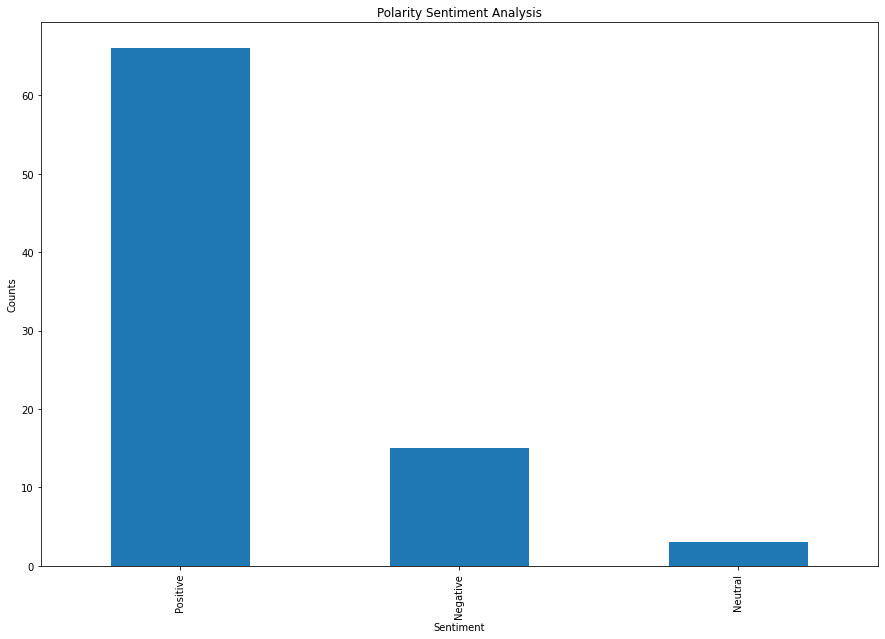

In [39]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

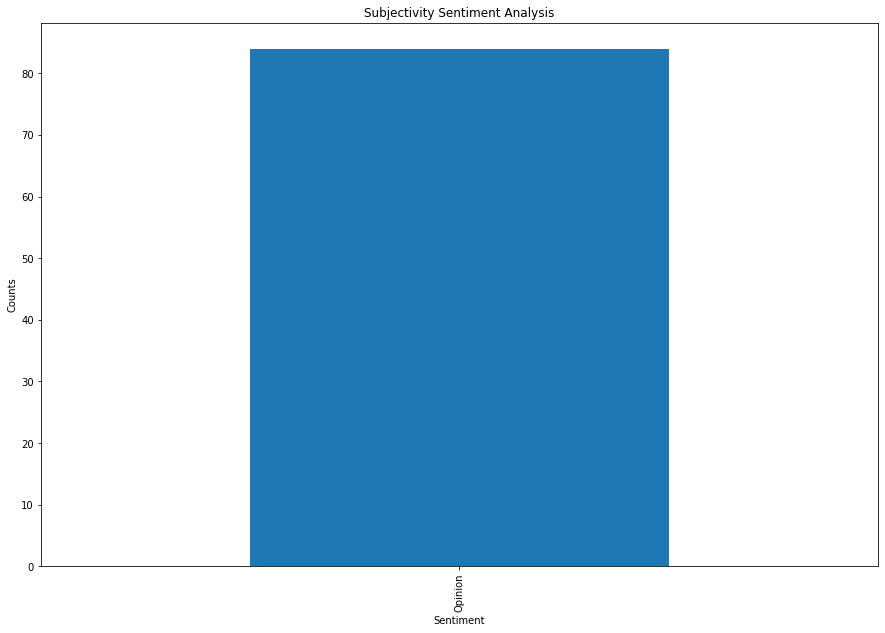

In [90]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

In [40]:
df['Ratings'] = df['Ratings'].replace({10:'VERY NEGATIVE',20:'NEGATIVE',30:'NEUTRAL',40:'POSITIVE',50:'VERY POSITIVE'})

D:\Software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


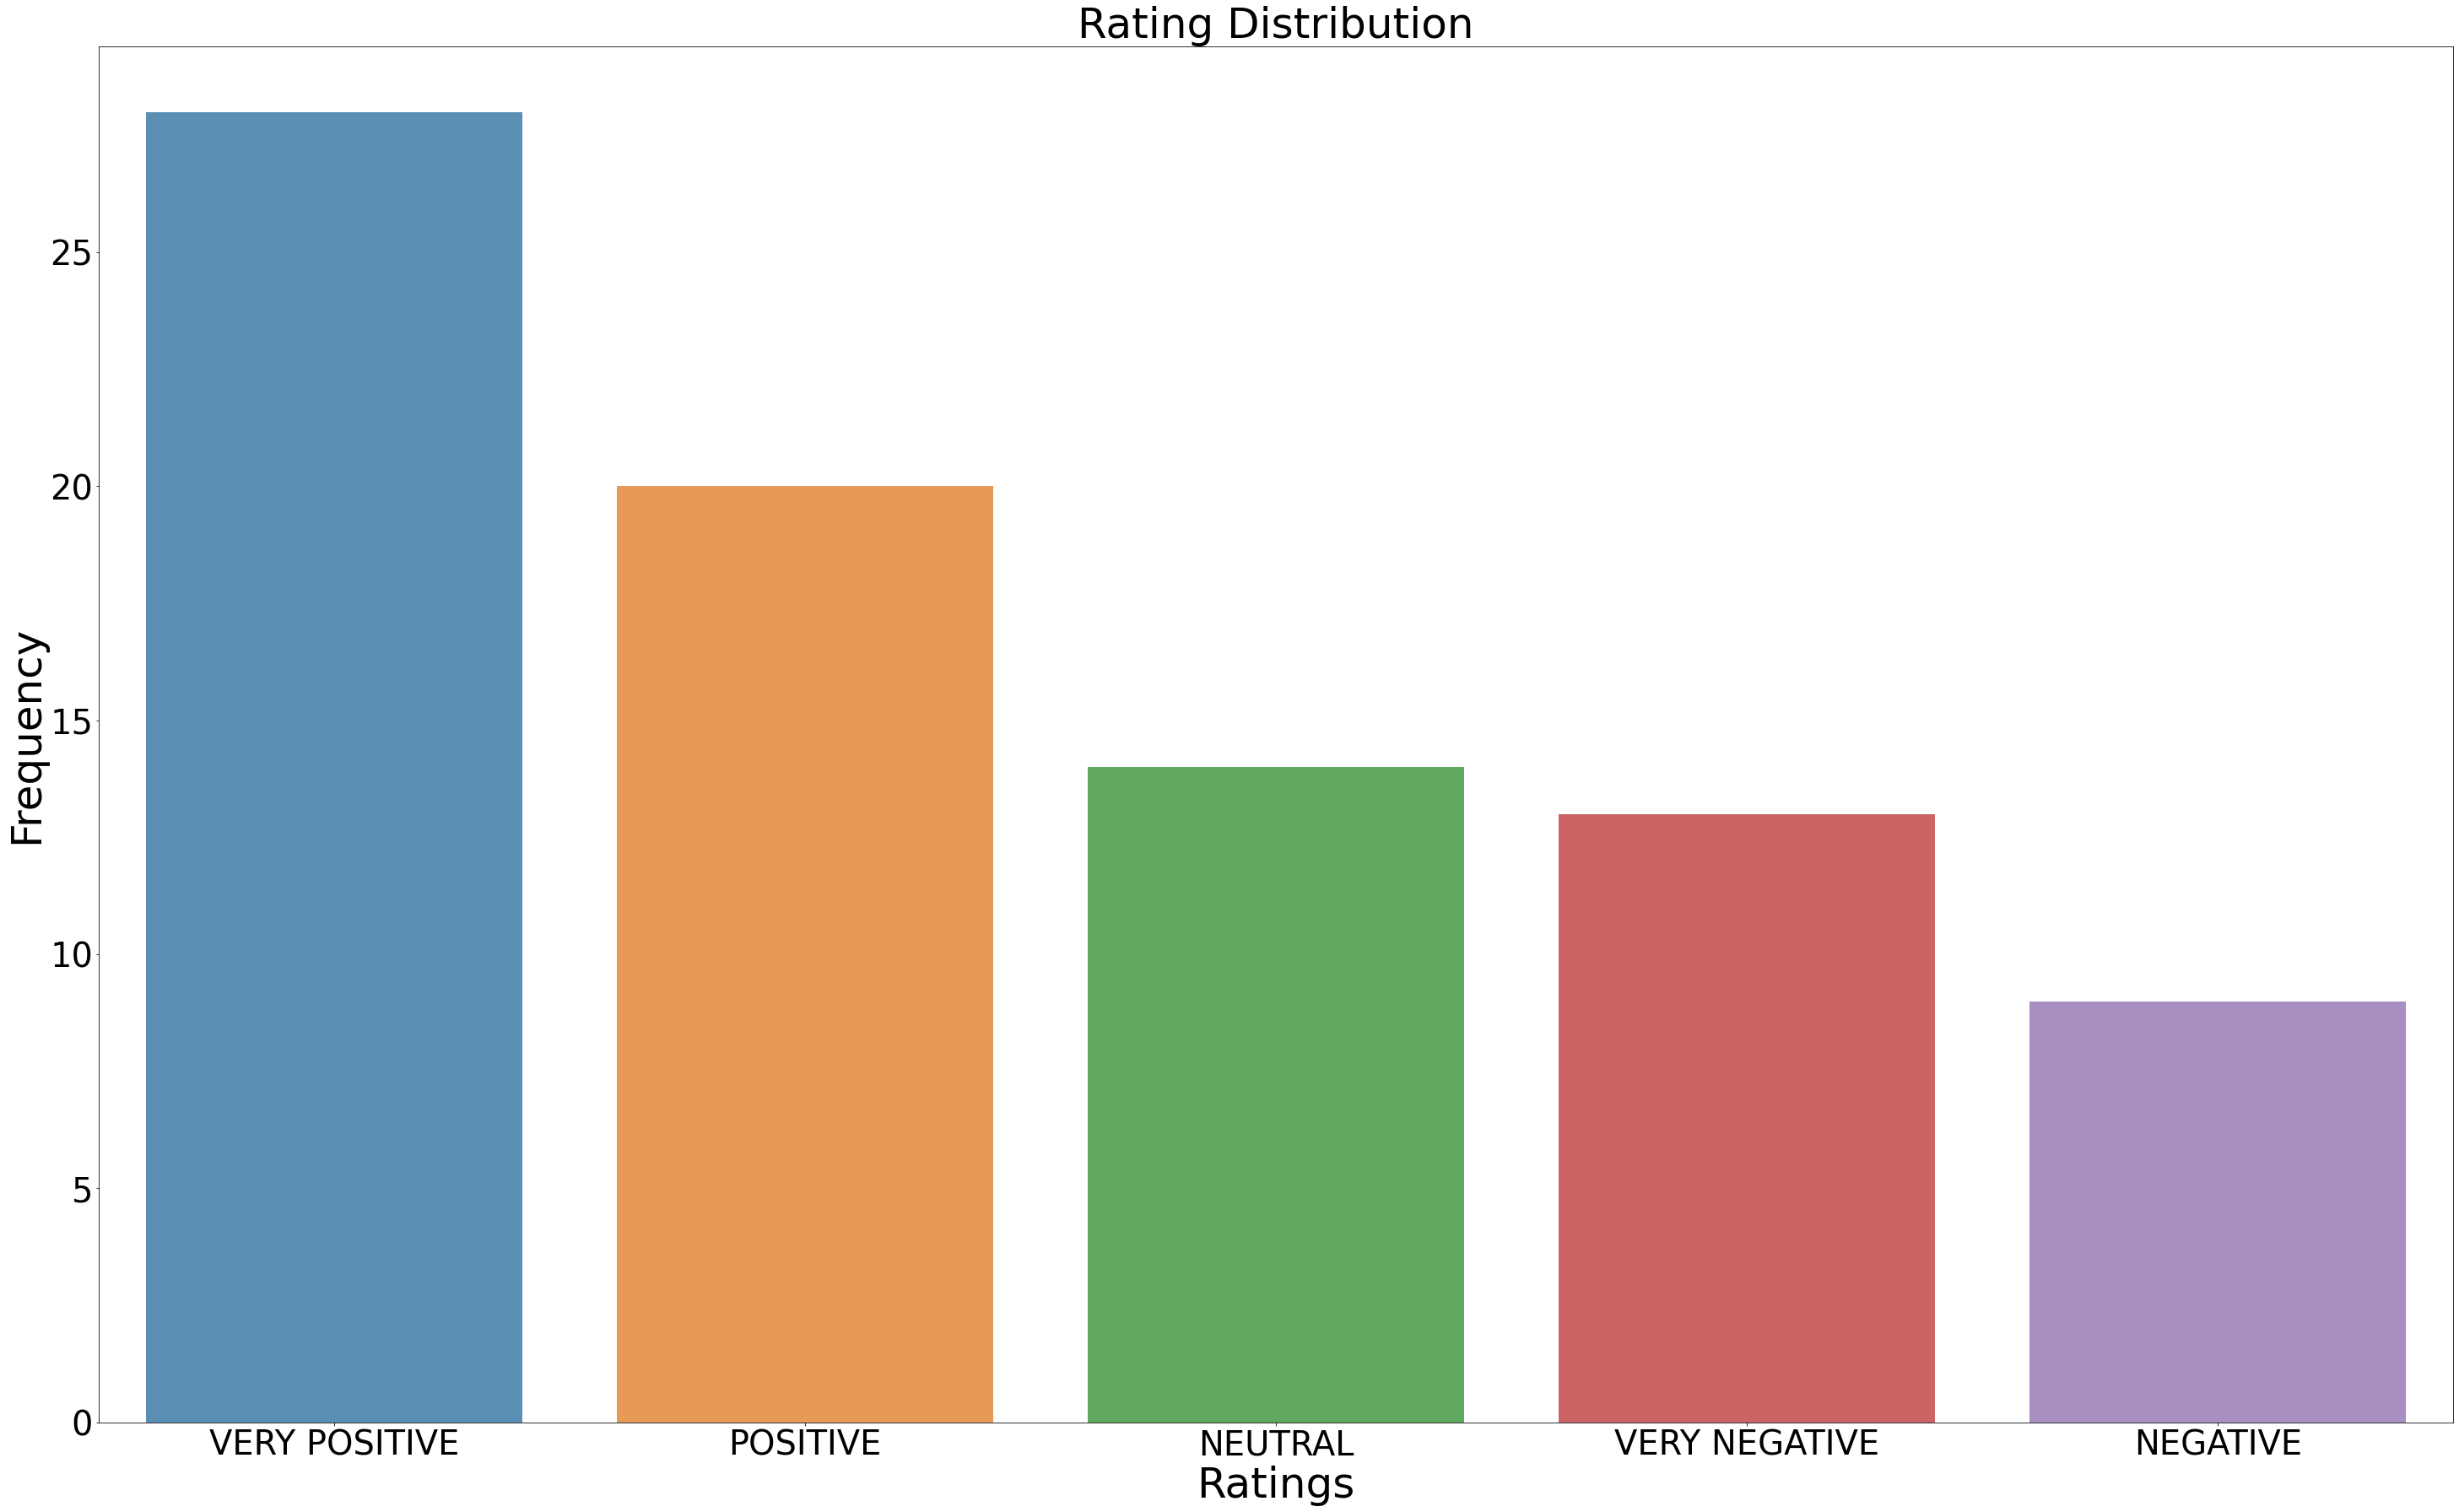

In [41]:

x_rating = df.Ratings.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Ratings', fontsize=50)
plt.xticks(fontsize=40)
plt.show()

In [42]:
import itertools
import collections

In [43]:
review_list = list(itertools.chain.from_iterable(df['Reviews_Lemm']))
rev_word_freq = collections.Counter(review_list)

word_freq_DF = pd.DataFrame(rev_word_freq.most_common(10), columns=['Words', 'Count'])
word_freq_DF

,Words,Count
0,food,64
1,pasta,38
2,order,33
3,go,25
4,vapiano,24
5,restaurant,24
6,good,24
7,staff,23
8,pizza,21
9,service,21


<AxesSubplot:xlabel='Words', ylabel='Count'>

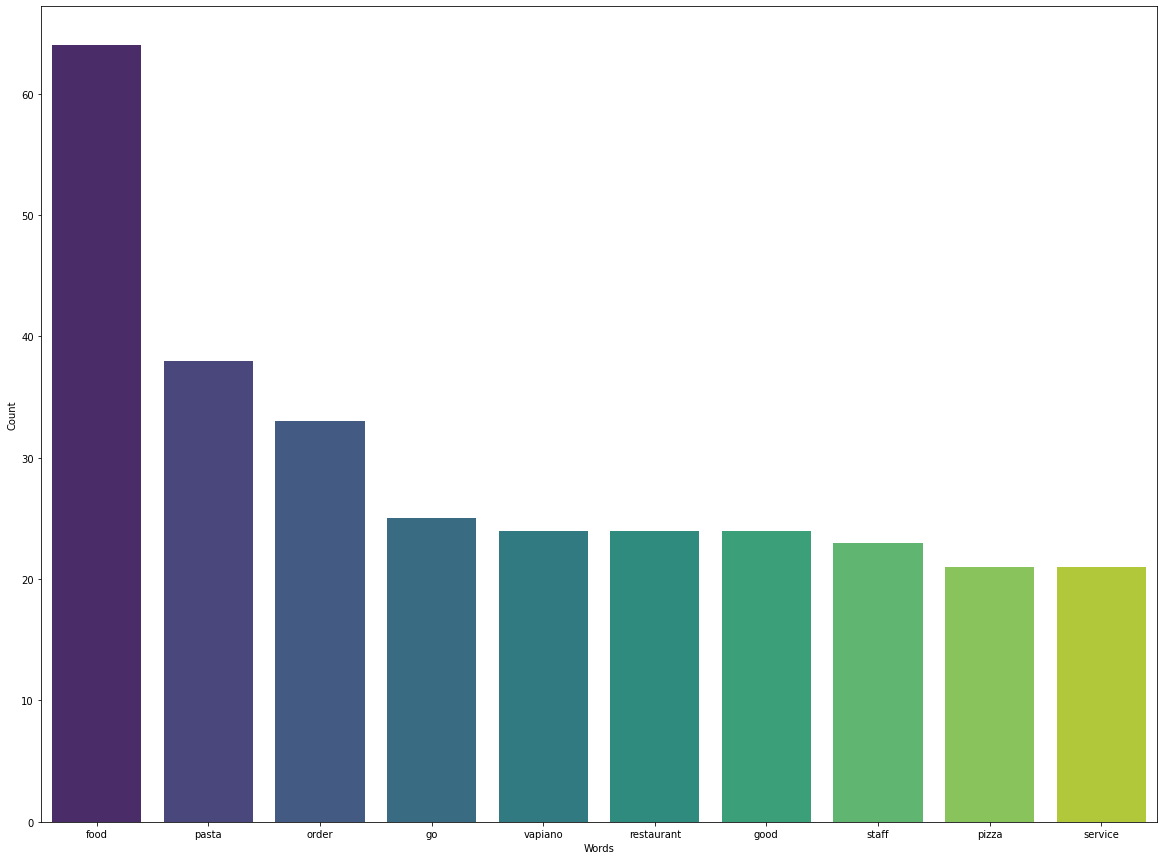

In [44]:
plt.figure(figsize=(20,15)) 
sns.barplot(data = word_freq_DF,x = "Words", y = "Count", palette = 'viridis')

In [49]:
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df['cleaned_Reviews'].values.astype('U'))
print(dtm_tf.shape)

(84, 23)


D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_Reviews'].values.astype('U'))
print(dtm_tfidf.shape)

(84, 23)


D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
D:\Software\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:1796: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [52]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=8, random_state=50)

In [53]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['bridg', 'visit', 'tower', 'price', 'restaur', 'chef', 'eat', 'place', 'good', 'love', 'great', 'fresh', 'concept', 'cook', 'staff', 'realli', 'nice', 'vapiano', 'pizza', 'pasta', 'time', 'servic', 'order']


Top 10 words for topic #1:
['bridg', 'fresh', 'concept', 'tower', 'place', 'servic', 'visit', 'cook', 'love', 'pizza', 'staff', 'eat', 'price', 'vapiano', 'good', 'nice', 'chef', 'order', 'time', 'realli', 'restaur', 'great', 'pasta']


Top 10 words for topic #2:
['visit', 'time', 'great', 'chef', 'pizza', 'bridg', 'tower', 'vapiano', 'cook', 'place', 'concept', 'restaur', 'realli', 'nice', 'fresh', 'love', 'staff', 'servic', 'pasta', 'eat', 'order', 'price', 'good']


Top 10 words for topic #3:
['time', 'fresh', 'pizza', 'price', 'staff', 'pasta', 'eat', 'realli', 'good', 'place', 'servic', 'order', 'great', 'cook', 'restaur', 'chef', 'nice', 'visit', 'concept', 'love', 'vapiano', 'tower', 'bridg']


Top 10 words for topic #4:
['realli', 'chef', 'order

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.027750  0.130048       1        1  17.444235
0      0.134929  0.009217       2        1  16.376398
3     -0.134958  0.204638       3        1  15.644964
2      0.188335 -0.249995       4        1  11.874923
7     -0.158307 -0.117824       5        1  10.786879
5     -0.274310 -0.134740       6        1  10.484410
1      0.167157  0.054322       7        1   8.835794
6      0.049405  0.104334       8        1   8.552397, topic_info=      Term       Freq      Total Category  logprob  loglift
11   pasta  39.000000  39.000000  Default  23.0000  23.0000
6     good  25.000000  25.000000  Default  22.0000  22.0000
10   order  32.000000  32.000000  Default  21.0000  21.0000
13   place  12.000000  12.000000  Default  20.0000  20.0000
12   pizza  21.000000  21.000000  Default  19.0000  19.0000
..     ...        ...        ...      ...      ...      ...
8     love   0.118740  19.928296   Topic8  -5.7767  -2.6640
22   visit   0.118767  20.423311   Topic8  -5.7764  -2.6883
17  servic   0.118732  20.467054   Topic8  -5.7767  -2.6907
18   staff   0.118721  21.761651   Topic8  -5.7768  -2.7522
10   order   0.118928  32.447745   Topic8  -5.7751  -3.1499

[207 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.118489    bridg
0         3  0.829426    bridg
1         3  0.280063     chef
1         5  0.560126     chef
1         7  0.140031     chef
...     ...       ...      ...
21        7  0.036883  vapiano
21        8  0.073765  vapiano
22        1  0.636528    visit
22        3  0.244818    visit
22        5  0.146891    visit

[80 rows x 3 columns], R=23, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 3, 8, 6, 2, 7])

In [56]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(84, 8)

In [57]:
df.columns

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Date', 'Ratings', 'Titles', 'Reviews', 'cleaned_Reviews',
       'Reviews_Token', 'Reviews_Lemm', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity'],
      dtype='object')

In [58]:
df=df.replace({0:'Food',1:'Order',2:'Restaurant',3:'Good',4:'Staff',5:'Pasta',6:'Service',7:'Visit'})

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
df['Topic'] = topic_values.argmax(axis=1)

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
df2 = df.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()
df2['Total'] = df2.sum(axis=1)

df2

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,6.0,NaN,10.0,16.0
1,NaN,NaN,6.0,6.0
2,NaN,NaN,4.0,4.0
3,3.0,1.0,13.0,17.0
4,3.0,NaN,11.0,14.0
5,1.0,NaN,8.0,9.0
6,1.0,1.0,7.0,9.0
7,1.0,1.0,7.0,9.0


In [64]:
for i in df2:
    df2[i] = round(df2[i]*100/df2.Total)

df2

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,38.0,NaN,62.0,100.0
1,NaN,NaN,100.0,100.0
2,NaN,NaN,100.0,100.0
3,18.0,6.0,76.0,100.0
4,21.0,NaN,79.0,100.0
5,11.0,NaN,89.0,100.0
6,11.0,11.0,78.0,100.0
7,11.0,11.0,78.0,100.0


In [65]:
df2=df2.fillna(0)

D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\Software\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


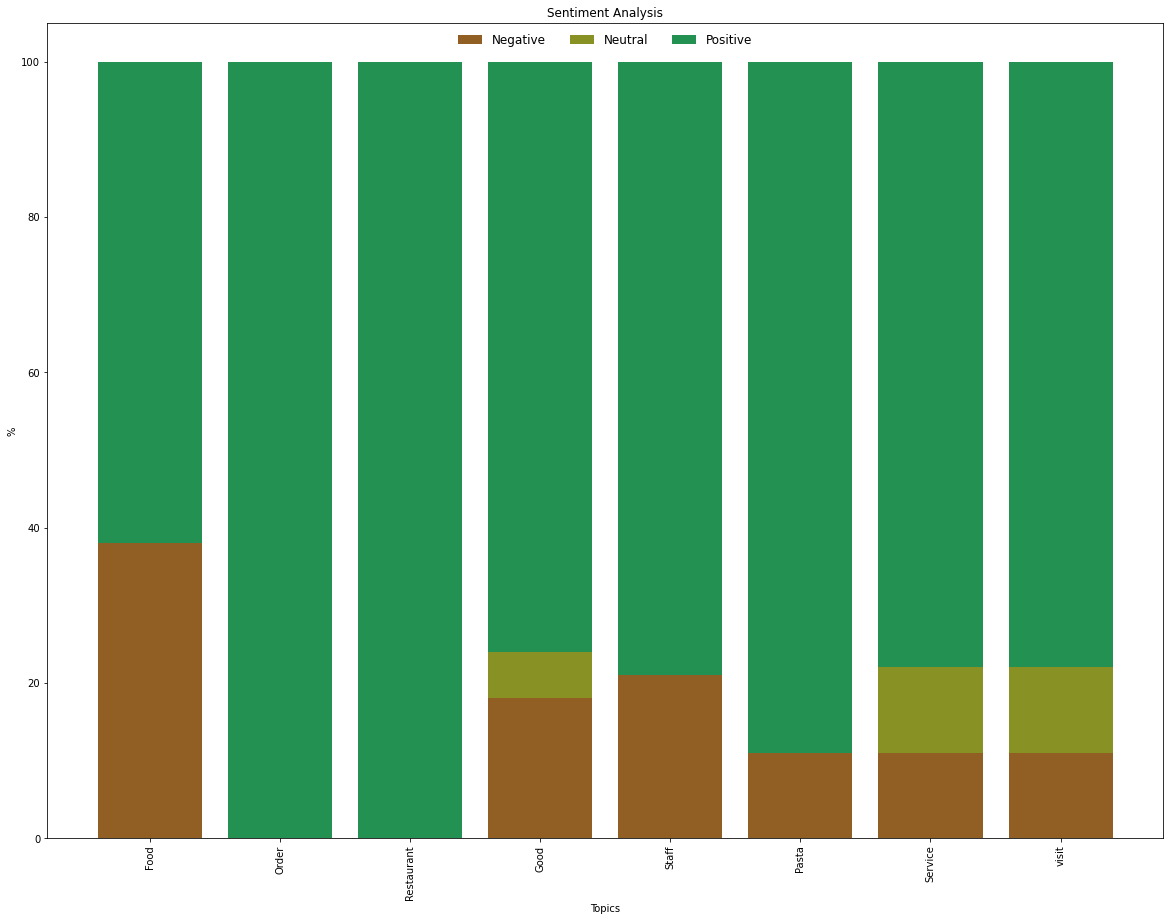

In [66]:
#Plotting and visualizing the counts
plt.figure(figsize=(20,15)) 



topic = ['Food','Order','Restaurant','Good','Staff','Pasta','Service','visit']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df2['Negative'], color='#915e23')
p2=plt.bar(topic,df2['Neutral'], color='#889123', bottom=df2['Negative'])
p3=plt.bar(topic,df2['Positive'], color='#239151', bottom=df2['Neutral']+df2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topics")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()